***Assignment 02***
Out: 10/23 19:00
Due: 11/06 19:00

**Instructions
Collaboration:**

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

**There are two requirements for collaboration:**

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

**Submitting your assignment:**

Please write a report PS2.pdf.

Create a jupyter notebook named PS2.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

**Late Submission:**

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records

***1***. Significant earthquakes since 2150 B.C.
The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2024-10-23_09-58-40_+0800.tsv) as an object and name it Sig_Eqs.

**1.1**[5 points] **Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.**

In [6]:
#Question 1
import pandas as pd
Sig_Eqs=pd.read_csv("earthquakes-2024-10-30_14-55-08_+0800.tsv",sep='\t')
#print(Sig_Eqs.tail(5))
#print(Sig_Eqs.columns)    #delete
#print(Sig_Eqs['Country'])   #delete
Groupby_Country = Sig_Eqs.groupby('Country')
Groupby_Country.head()    #delete
Country_death_total_number = Groupby_Country['Deaths'].sum().reset_index(name='Total_Deaths_every_Country')
print(Country_death_total_number.sort_values(by='Total_Deaths_every_Country',ascending=False).head(20))

          Country  Total_Deaths_every_Country
28          CHINA                   2075947.0
141        TURKEY                   1188881.0
65           IRAN                   1011453.0
69          ITALY                    498418.0
132         SYRIA                    439224.0
58          HAITI                    323478.0
10     AZERBAIJAN                    317219.0
71          JAPAN                    279607.0
6         ARMENIA                    191890.0
103      PAKISTAN                    145083.0
66           IRAQ                    136200.0
40        ECUADOR                    135496.0
142  TURKMENISTAN                    117412.0
107          PERU                    102169.0
68         ISRAEL                     90388.0
110      PORTUGAL                     83572.0
53         GREECE                     80378.0
27          CHILE                     64277.0
62          INDIA                     63507.0
133        TAIWAN                     57153.0


**1.2** [10 points] **Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?**

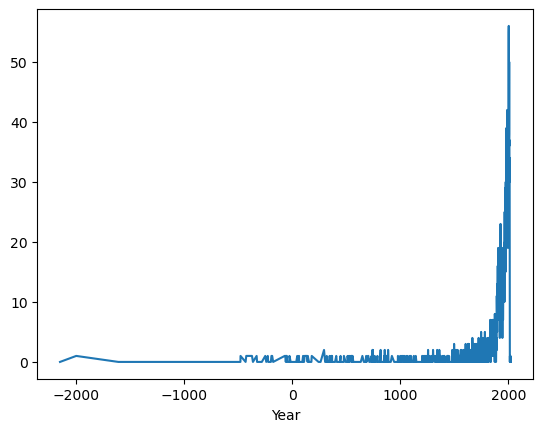

In [8]:
#Question  2
Earthquakes_magnitude = Sig_Eqs.groupby('Year')
Earthquakes_magnitude.head()
Len_of_Earthquakes_magnitude_more_than_3 = Earthquakes_magnitude['Ms'].apply(lambda x: x.gt(3).sum()).plot()


#***解释***：从2000年以来，每年发生超过三级的地震次数越来越多，一方面可能是以前的计数不完整，另一方卖弄说明地球地质活动越来越剧烈。

**1.3** [10 points] **Write a function CountEq_LargestEq that returns (1)the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.**

In [12]:
#Question  3
import pandas as pd

def CountEq_LargestEq(Country):   #定义函数
    Earthquakes_time_of_the_Country = Sig_Eqs.loc[Sig_Eqs['Country'] == Country]
    Earthquakes_times = len(Earthquakes_time_of_the_Country)     #统计所有的地震次数
    
    if Earthquakes_times == 0:
        return {
            'Country': Country,
            'Total_Earthquakes': Earthquakes_times,
            'Max_Magnitude': None,
            'Date': "NaN",  
            'Location': ""
        }

    # 确保存在最大震级的行
    if Earthquakes_time_of_the_Country['Ms'].notna().any():
        max_eq_data = Earthquakes_time_of_the_Country.loc[Earthquakes_time_of_the_Country['Ms'].idxmax()]
    else:
        return {
            'Country': Country,
            'Total_Earthquakes': Earthquakes_times,
            'Max_Magnitude': None,
            'Date': "NaN",
            'Location': ""
        }

    # 获取需要的值
    Largest_Earthquakes_Ms = max_eq_data['Ms'] if 'Ms' in max_eq_data else None
    Location_location = max_eq_data['Location Name'] if 'Location Name' in max_eq_data else ""
    
    # 获取年份、月份和日期，处理缺失值
    year = max_eq_data['Year'] if 'Year' in max_eq_data else None
    month = max_eq_data['Mo'] if 'Mo' in max_eq_data else None
    day = max_eq_data['Dy'] if 'Dy' in max_eq_data else None
    
    # 构造日期字符串，若有 NaN 值，则保存为 "NaN" 或空字符串
    if pd.notna(year) and pd.notna(month) and pd.notna(day):
        Date = f"{int(year)}-{int(month):02d}-{int(day):02d}"
    else:
        Date = "NaN"  # 或者使用 "" 

    return {
        'Country': Country,
        'Total_Earthquakes': Earthquakes_times,
        'Max_Magnitude': Largest_Earthquakes_Ms,
        'Date': Date,
        'Location': Location_location
    }

# 遍历所有国家并获取结果
all_countries = Sig_Eqs ['Country'].dropna().unique()  # 去掉国家名中的 NaN
results = []

for country in all_countries:
    result = CountEq_LargestEq(country)
    results.append(result)

# 转换为 DataFrame
results_df = pd.DataFrame(results)

# 按照最大震级降序排序
results_df.sort_values(by='Max_Magnitude', ascending=False, inplace=True)

# 打印结果
print(results_df)



            Country  Total_Earthquakes  Max_Magnitude        Date  \
54              USA                278            9.1  1957-03-09   
70        INDONESIA                412            8.8  2004-12-26   
58            CHILE                199            8.7  1730-07-08   
117        MONGOLIA                  6            8.7  1905-07-23   
8             INDIA                101            8.7  1897-06-12   
..              ...                ...            ...         ...   
149         BURUNDI                  1            NaN         NaN   
153  CZECH REPUBLIC                  1            NaN         NaN   
154      MADAGASCAR                  1            NaN         NaN   
155          ZAMBIA                  1            NaN         NaN   
156         COMOROS                  1            NaN         NaN   

                                        Location  
54                                        ALASKA  
70   INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST  
58                

#最高的地震为发生在USA的ALASKA，1957年3月9日。震级为9.1级

***2***. **Air temperature in Shenzhen during the past 25 years**

In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the Baoan International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

[10 poin**ts] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 ye**ars?

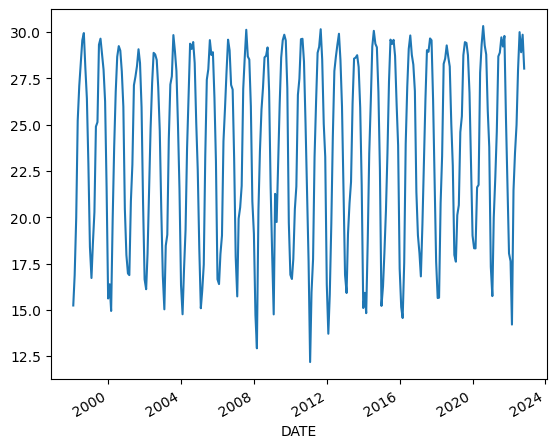

In [16]:
#Question 2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 用 pandas 读取指定列
df = pd.read_csv('Baoan_Weather_1998_2022.csv', usecols=['DATE', 'TMP'])

# 转换 'DATE' 列为日期格式
df['DATE'] = pd.to_datetime(df['DATE'])

# 去掉 TMP 列中的 '+' 号，将 ',' 替换为 '.'，并转换为浮点数
df['TMP'] = df['TMP'].str.replace('+', '')
df['TMP'] = df['TMP'].str.split(',', expand=True)[0]  # 分割并保留第一个部分
df['TMP'] = df['TMP'].astype(float)  # 转换为浮点数

# 对温度数据应用缩放因子（缩放因子为 10）
df['TMP'] = df['TMP'] / 10

# 将 DataFrame 转换为 xarray DataArray
da = xr.DataArray(
    data=df['TMP'].values,          # 数值数据
    coords={'DATE': df['DATE']},     # 时间坐标
    dims=['DATE']                    # 设置时间为维度名称
)
dh=da.where(da != 999.9, drop=True)
monthly_avg = dh.resample(DATE='ME').mean()
monthly_avg.plot()


#趋势变化不大，说明从2000年到2024年温度变化不大

***3***. Global collection of hurricanes
The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centers, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessa)
df.head()

**3.1** [5 points] **Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 读取并处理数据
Group_Wind_speed = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                               usecols=['SID', 'NAME', 'WMO_WIND'],
                               skiprows=[1], 
                               na_values=['NOT_NAMED', 'NAME'])

# 将 'WMO_WIND' 列转换为数值类型并去除缺失值
Group_Wind_speed['WMO_WIND'] = pd.to_numeric(Group_Wind_speed['WMO_WIND'], errors='coerce')
Group_Wind_speed = Group_Wind_speed.dropna(subset=['WMO_WIND'])

# 找到每个 'SID' 组中 'WMO_WIND' 的最大值所在的行
max_wind_speed_rows = Group_Wind_speed.loc[Group_Wind_speed.groupby('SID')['WMO_WIND'].idxmax()]
# 查看结果
max_wind_speed_rows_sorted=max_wind_speed_rows.sort_values('WMO_WIND',ascending=False).head(10)
max_wind_speed_rows_sorted

C:\Users\11294\AppData\Local\Temp\ipykernel_15388\3039521669.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  Group_Wind_speed = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,NAME,WMO_WIND
665955,2015293N13266,PATRICIA,185.0
427637,1980214N11330,ALLEN,165.0
689333,2019236N10314,DORIAN,160.0
482075,1988253N12306,GILBERT,160.0
605747,2005289N18282,WILMA,160.0
178210,1935241N23291,NaN,160.0
552460,1997253N12255,LINDA,160.0
676144,2017242N16333,IRMA,155.0
560438,1998295N12284,MITCH,155.0
629195,2009288N07267,RICK,155.0


**解释**#报警为第五列存在一些多类型的数据，但是第五列我一直没用，所以就没有去调整他。

**3.2** [5 points] **Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.**

Text(0, 0.5, 'WMO_WIND')

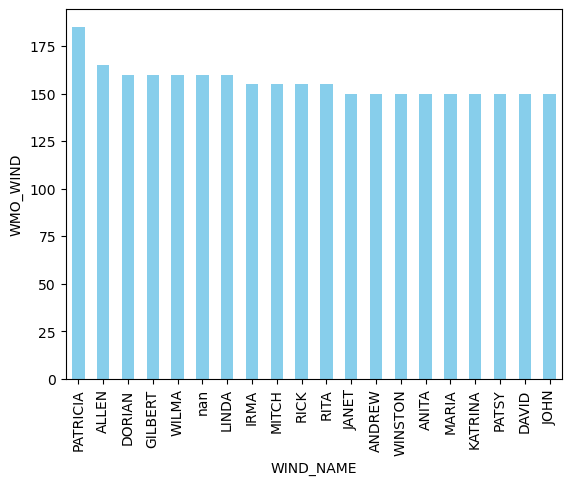

In [3]:
top_20 = max_wind_speed_rows.sort_values('WMO_WIND',ascending=False).head(20)

top_20.plot(kind='bar', x='NAME', y='WMO_WIND', color='skyblue', legend=False)
plt.xlabel('WIND_NAME')
plt.ylabel('WMO_WIND')

**3.3** [5 points] **Plot the count of all datapoints by Basin as a bar chart.**

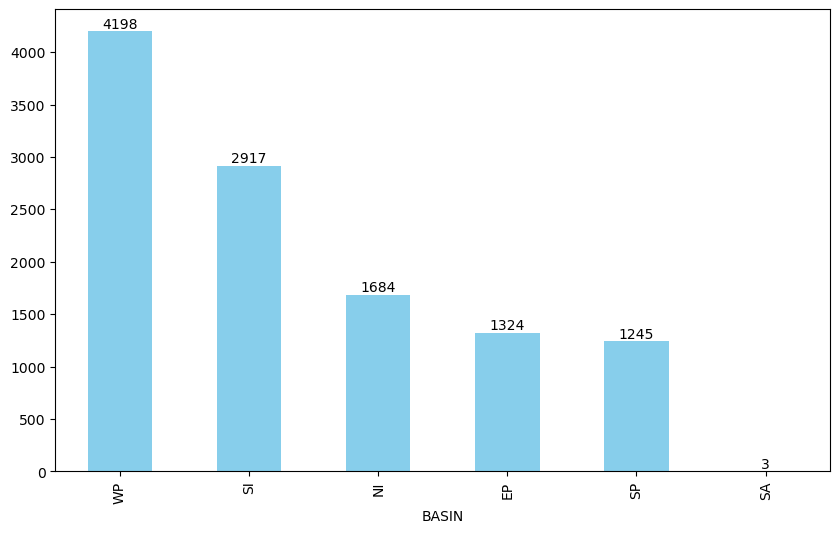

In [5]:
Basin_data = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                               usecols=['BASIN','SID'],
                               skiprows=[1])
Basin_data_groupby = Basin_data.groupby('SID').first().reset_index()

basin_counts = Basin_data_groupby['BASIN'].value_counts().plot(kind='bar',color='skyblue', figsize=(10, 6))
for p in basin_counts.containers:
    basin_counts.bar_label(p, label_type='edge')

**3.4** [5 points] **Make a hexbin plot of the location of datapoints in Latitude and Longitude.**

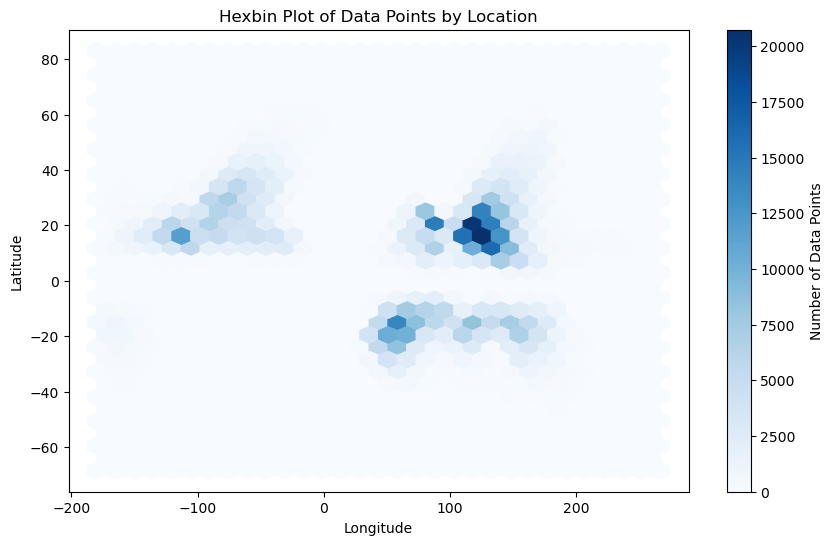

In [7]:
#question 3.4
location_lon_and_lat = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=['LON','LAT'],
                 skiprows=[1], 
                 na_values=['NOT_NAMED', 'NAME'])
location_lon_and_lat.head()
# 创建 hexbin 图
plt.figure(figsize=(10, 6))
plt.hexbin(location_lon_and_lat['LON'], location_lon_and_lat['LAT'], gridsize=30, cmap='Blues')

# 添加颜色条来表示密度
plt.colorbar(label='Number of Data Points')

# 设置标签和标题
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points by Location')
plt.show()

**3.5** [5 points] **Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.**

C:\Users\11294\AppData\Local\Temp\ipykernel_15388\1740204007.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  Typhoon_Mangkhut = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
C:\Users\11294\AppData\Local\Temp\ipykernel_15388\1740204007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Typhoon_Mangkhut_rows.dropna(subset=['LAT','LON'],inplace=True)


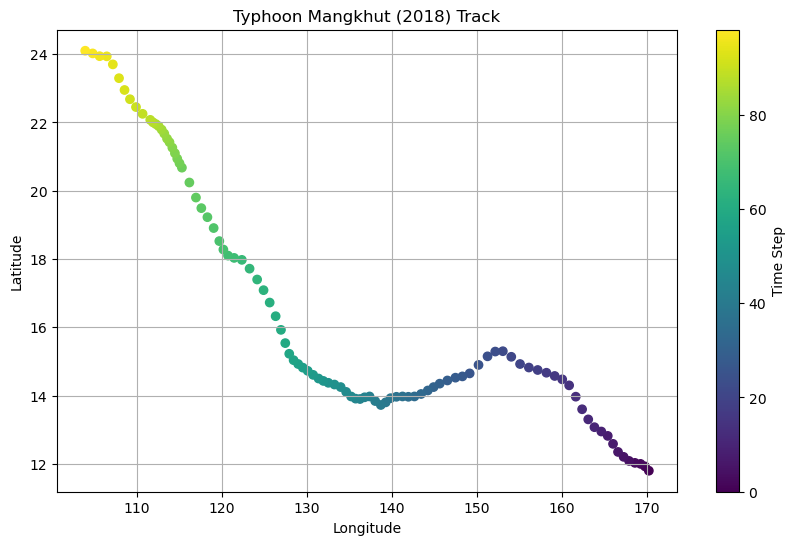

In [9]:
#QUESTION 3.5
Typhoon_Mangkhut = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                               usecols=['SID', 'NAME', 'LON','LAT','SEASON'],
                               skiprows=[1], 
                               na_values=['NOT_NAMED', 'NAME'])
Typhoon_Mangkhut_rows = Typhoon_Mangkhut[(Typhoon_Mangkhut['NAME']=='MANGKHUT')&(Typhoon_Mangkhut['SEASON']==2018)]
Typhoon_Mangkhut_rows.dropna(subset=['LAT','LON'],inplace=True)
#print(Typhoon_Mangkhut_rows)
#Typhoon_Mangkhut_rows.plot(
plt.figure(figsize=(10, 6))
plt.scatter(Typhoon_Mangkhut_rows['LON'], Typhoon_Mangkhut_rows['LAT'], c=range(len(Typhoon_Mangkhut_rows['LON'])), cmap='viridis', marker='o')
plt.colorbar(label='Time Step')  # 加上颜色条，表示时间顺序

# 设置标题和标签
plt.title("Typhoon Mangkhut (2018) Track")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# 显示图表
plt.show()

**3.6** [5 points] **Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.**

In [11]:
filtered_df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                           usecols=['ISO_TIME','SEASON','SID','NAME','BASIN'],
                          parse_dates=['ISO_TIME'],
                            skiprows=[1] )
filtered_df=filtered_df[(filtered_df['SEASON'] >= 1970) & (filtered_df['BASIN'].isin(['WP', 'EP']))]

**3.7** [5 points] **Plot the number of datapoints per day.**

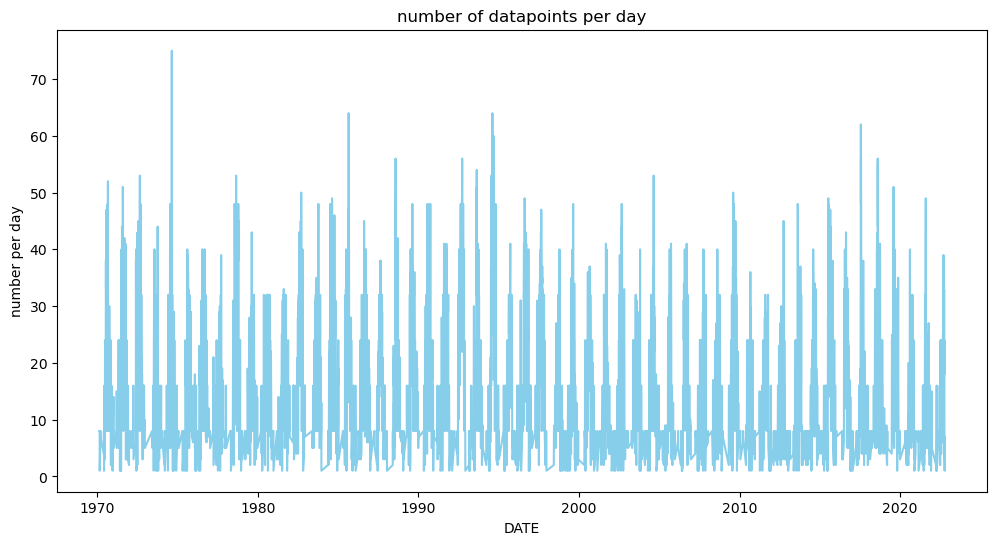

In [12]:
filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'])
data_counts=filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# 绘制每一天的数据点数量
plt.figure(figsize=(12, 6))
data_counts.plot(kind='line', color='skyblue')
plt.xlabel('DATE')
plt.ylabel('number per day')
plt.title('number of datapoints per day')
plt.show()

**3.8** [5 points] **Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.**

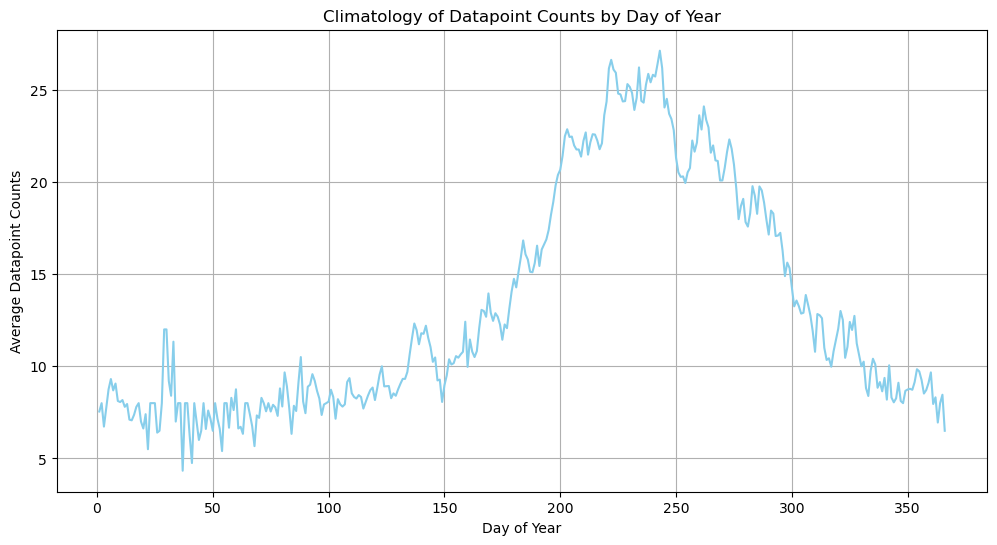

In [15]:
filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'])

# 提取年份和日序号
filtered_df['Year'] = filtered_df['ISO_TIME'].dt.year
filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear

# 按日序号和年份分组，计数每一天的数据点数量
daily_counts = filtered_df.groupby(['Year', 'DayOfYear']).size().reset_index(name='Counts')

# 计算每一天的平均值（即气候学）
climatology = daily_counts.groupby('DayOfYear')['Counts'].mean().reset_index()

# 绘制气候学
plt.figure(figsize=(12, 6))
plt.plot(climatology['DayOfYear'], climatology['Counts'], color='skyblue')
plt.xlabel('Day of Year')
plt.ylabel('Average Datapoint Counts')
plt.title('Climatology of Datapoint Counts by Day of Year')
plt.grid()
plt.show()

**3.9** [5 points] **Calculate the anomaly of daily counts from the climatology.**

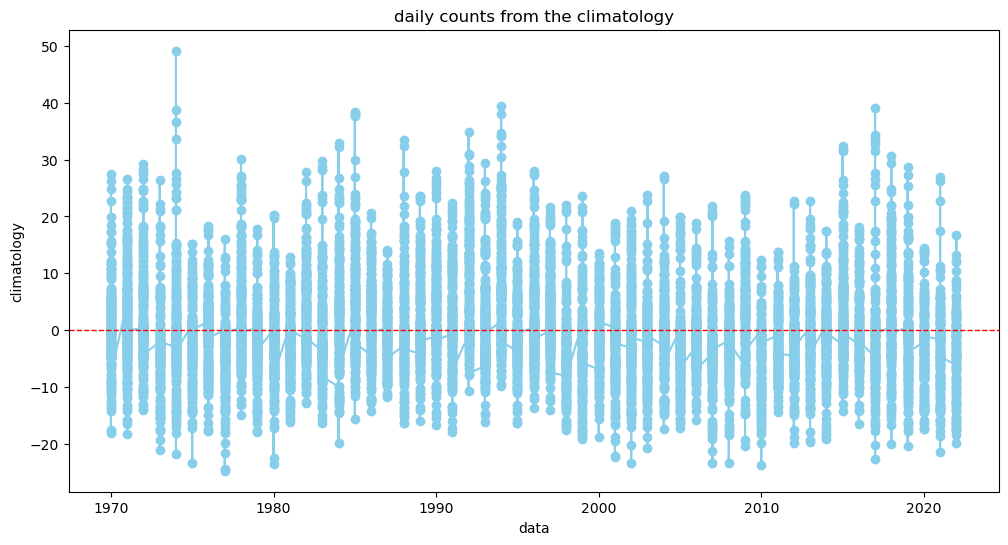

       ISO_TIME  day_of_year  Counts  Counts_climatology    anomaly
0          1970           50       8            6.500000   1.500000
1          1970           51       8            8.000000   0.000000
2          1970           52       8            7.166667   0.833333
3          1970           53       8            6.600000   1.400000
4          1970           54       8            5.400000   2.600000
...         ...          ...     ...                 ...        ...
10812      2022          277       9           17.980769  -8.980769
10813      2022          278       7           18.693878 -11.693878
10814      2022          282       1           18.301887 -17.301887
10815      2022          283       7           19.769231 -12.769231
10816      2022          285       3           18.269231 -15.269231

[10817 rows x 5 columns]


In [51]:
# 将 'ISO_TIME' 转换为 datetime 格式
filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'])

# 创建 day_of_year 列并计算每日的计数
filtered_df['day_of_year'] = filtered_df['ISO_TIME'].dt.dayofyear
daily_counts = filtered_df.groupby([filtered_df['ISO_TIME'].dt.year, 'day_of_year']).size().reset_index(name='Counts')

# 计算气候学平均值（即每年的每日平均计数）
climatology = daily_counts.groupby('day_of_year')['Counts'].mean()

# 将 climatology 数据添加回 daily_counts 以便计算 anomaly
daily_counts = daily_counts.join(climatology, on='day_of_year', rsuffix='_climatology')
daily_counts['anomaly'] = daily_counts['Counts'] - daily_counts['Counts_climatology']

# 绘制 anomaly 随年份变化的图像
plt.figure(figsize=(12, 6))
plt.plot(daily_counts['ISO_TIME'], daily_counts['anomaly'], marker='o', linestyle='-', color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('data')
plt.ylabel('climatology')
plt.title('daily counts from the climatology')
plt.show()
print(daily_counts)

**3.10** [5 points] **Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?**

   ISO_TIME  day_of_year       date  Counts
0      1970           50 1970-02-19       8
1      1970           51 1970-02-20       8
2      1970           52 1970-02-21       8
3      1970           53 1970-02-22       8
4      1970           54 1970-02-23       8
5      1970           55 1970-02-24       8
6      1970           56 1970-02-25       8
7      1970           57 1970-02-26       8
8      1970           58 1970-02-27       8
9      1970           59 1970-02-28       1


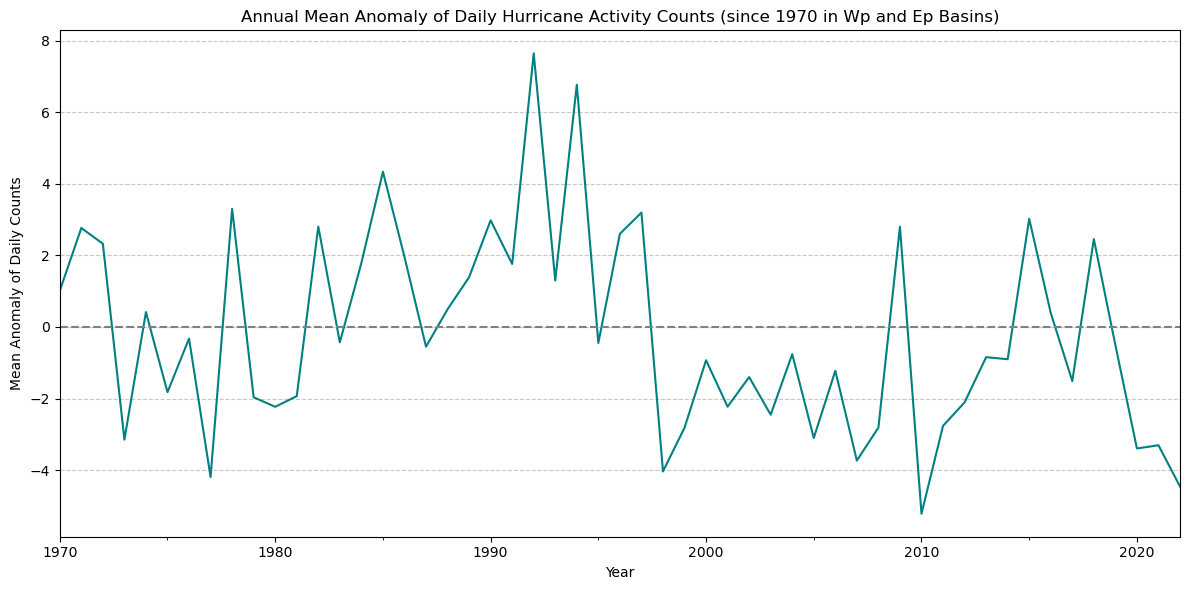

In [73]:
# 创建一个新的 'date' 列，将年份和一年中的天数组合成 datetime 类型
daily_counts['date'] = pd.to_datetime(
    daily_counts['ISO_TIME'].astype(str) + '-' + daily_counts['day_of_year'].astype(str).str.zfill(3),
    format='%Y-%j'
)

# 检查转换结果
print(daily_counts[['ISO_TIME', 'day_of_year', 'date','Counts']].head(10))
annual_anomalies = daily_counts.resample('YE', on='date')['anomaly'].mean()
#Plot the annual anomalies
plt.figure(figsize=(12,6))
annual_anomalies.plot(kind='line',color='teal')
plt.title('Annual Mean Anomaly of Daily Hurricane Activity Counts (since 1970 in Wp and Ep Basins)')
plt.xlabel('Year')
plt.ylabel('Mean Anomaly of Daily Counts')
plt.axhline(0, color='gray', linestyle='--')   
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
# Show the plot
plt.show()


**答:** 1995年有着最大的异常值，高达7.5。

***4***. Explore a data set
Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

**4.1** [5 points] **Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.**

In [18]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

ds=pd.read_csv('SMO-gage_1985.dap.txt',
              skiprows=[1,2,3,4,0],
               sep=r'\s+',
              usecols=['time','DD','MM','YYYY','hh','CH3CCl3','CCl4','N2O','CH4']
              )
# 仅保留 CH3CCl3, CCl4, N2O, 和 CH4 中至少有一个值不是 0 的行
filtered_ds = ds.loc[~((ds['CH3CCl3'] == 0) & 
                       (ds['CCl4'] == 0) & 
                       (ds['N2O'] == 0) & 
                       (ds['CH4'] == 0))].copy()

**4.2** [5 points] **Plot the time series of a certain variable.**

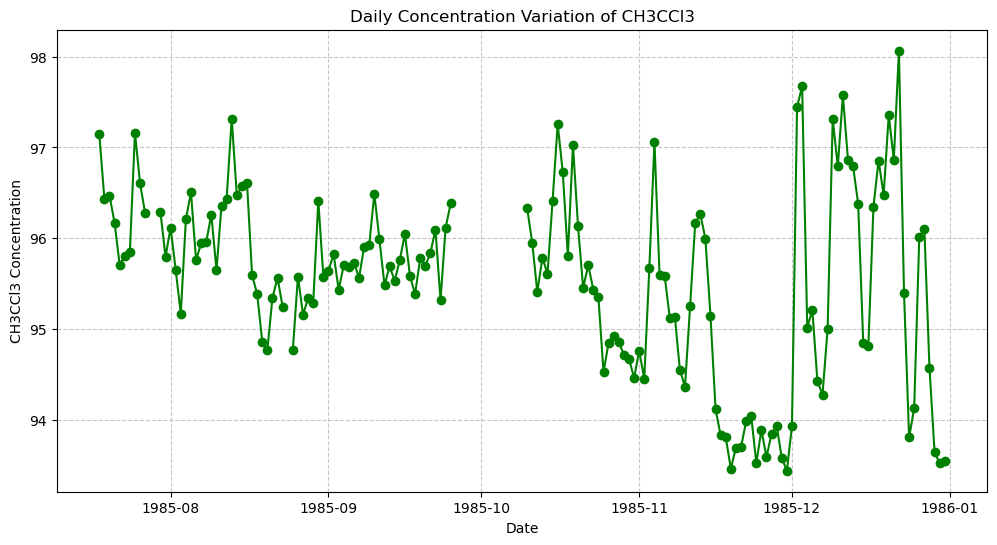

In [26]:
# 将日期和时间列转换为时间戳
filtered_ds['timestamp'] = pd.to_datetime(
   filtered_ds['YYYY'].astype(str) + '-' + filtered_ds['MM'].astype(str) + '-' + 
    filtered_ds['DD'].astype(str) + ' ' +filtered_ds['hh'].astype(str),
    format='%Y-%m-%d %H'
)

# 计算按日的平均浓度变化,去掉值为零的列
CH3CCl3_concentration_variation=filtered_ds[filtered_ds['CH3CCl3'] != 0]
CH3CCl3_daily_concentration_variation = CH3CCl3_concentration_variation.resample('D', on='timestamp')['CH3CCl3'].mean()

# 绘制每日浓度变化折线图
plt.figure(figsize=(12, 6))
plt.plot(CH3CCl3_daily_concentration_variation.index, CH3CCl3_daily_concentration_variation, color='green', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CH3CCl3 Concentration')
plt.title('Daily Concentration Variation of CH3CCl3')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**4.3** [5 points] **Conduct at least 5 simple statistical checks with the variable, and report your findings**

In [36]:
mean_ch3ccl3 =  CH3CCl3_concentration_variation['CH3CCl3'].mean()
print(f"Mean of CH3CCl3: {mean_ch3ccl3}")
median_ch3ccl3 =  CH3CCl3_concentration_variation['CH3CCl3'].median()
print(f"Median of CH3CCl3: {median_ch3ccl3}")
std_dev_ch3ccl3 =  CH3CCl3_concentration_variation['CH3CCl3'].std()
print(f"Standard Deviation of CH3CCl3: {std_dev_ch3ccl3}")
max_ch3ccl3 = CH3CCl3_concentration_variation['CH3CCl3'].max()
min_ch3ccl3 =  CH3CCl3_concentration_variation['CH3CCl3'].min()
print(f"Max of CH3CCl3: {max_ch3ccl3}")
print(f"Min of CH3CCl3: {min_ch3ccl3}")

Mean of CH3CCl3: 95.48149564206855
Median of CH3CCl3: 95.518
Standard Deviation of CH3CCl3: 1.2549505540656187
Max of CH3CCl3: 99.58
Min of CH3CCl3: 91.873


**#解释** 对三氯乙烷的浓度进行分析，去掉了所有的无效值，发现三氯乙烷的平均浓度为95.48，说明该地的三氯乙烷浓度较高。